<a href="https://colab.research.google.com/github/tonykks/2024_mirae_master/blob/main/%ED%8F%AD%EC%97%BC%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd

# Re-running the code with explicit file paths to ensure correct data extraction

# Define file paths explicitly based on uploaded files
file_paths = [
    './HW_2019-05.xlsx', './HW_2019-06.xlsx', './HW_2019-07.xlsx',
    './HW_2019-08.xlsx', './HW_2019-09.xlsx', './HW_2020-05.xlsx',
    './HW_2020-06.xlsx', './HW_2020-07.xlsx', './HW_2020-08.xlsx',
    './HW_2020-09.xlsx', './HW_2021-05.xlsx', './HW_2021-06.xlsx',
    './HW_2021-07.xlsx', './HW_2021-08.xlsx', './HW_2021-09.xlsx',
    './HW_2022-05.xlsx', './HW_2022-06.xlsx', './HW_2022-07.xlsx',
    './HW_2022-08.xlsx', './HW_2022-09.xlsx', './HW_2023-05.xlsx',
    './HW_2023-06.xlsx', './HW_2023-07.xlsx', './HW_2023-08.xlsx',
    './HW_2023-09.xlsx', './HW_2024-05.xlsx', './HW_2024-06.xlsx',
    './HW_2024-07.xlsx', './HW_2024-08.xlsx', './HW_2024-09.xlsx'
]

# Initialize final DataFrame to accumulate data for both years
df_jeju_final = pd.DataFrame()

# Iterate over each file to process '제주(184)' data
for file_path in file_paths:
    # Load each file
    df = pd.read_excel(file_path)

    # Extract year and month from file name
    year_month = file_path.split('_')[1].split('.')[0]  # e.g., "2019-05"
    year, month = year_month.split('-')

    # Filter for 제주(184) and assign to specific variable
    df_jeju_month = df[df['지점'] == '제주(184)']
    globals()[f"df_jeju_{year}_{month}"] = df_jeju_month  # e.g., df_jeju_2019_05

    # Aggregate each year's data and store in respective variable
    if f"df_jeju_{year}" not in globals():
        globals()[f"df_jeju_{year}"] = pd.DataFrame()
    globals()[f"df_jeju_{year}"] = pd.concat([globals()[f"df_jeju_{year}"], df_jeju_month], ignore_index=True)

    # Append to final DataFrame
    df_jeju_final = pd.concat([df_jeju_final, df_jeju_month], ignore_index=True)

# Display the combined data
df_jeju_final.head()


,일시,지점,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%),폭염특보(O/X),폭염영향예보(단계),열대야(O/X),자외선지수(단계)
0,2019-05-01,제주(184),X,20.0,18.6,14.7,12.4,74.6,X,,X,높음
1,2019-05-02,제주(184),X,21.7,21.5,17.2,12.8,40.9,X,,X,매우높음
2,2019-05-03,제주(184),X,22.3,21.9,18.9,16.0,49.0,X,,X,매우높음
3,2019-05-04,제주(184),X,22.1,23.3,19.2,14.7,48.0,X,,X,매우높음
4,2019-05-05,제주(184),X,22.2,22.2,19.0,16.4,51.9,X,,X,높음


In [ ]:
# 첫 행의 컬럼명을 지정된 대로 변경하고, '일시' 열의 시간 부분을 제거한 후 다시 저장합니다.
df_jeju_final.columns = ["일시", "지점", "폭염", "최고체감온도", "최고기온", "평균기온",
                        "최저기온", "평균상대습도", "폭염특보", "폭염영향예보(단계)", "열대야",
                        "자외선지수"]

# '일시' 열에서 시간 부분 제거 (날짜까지만 표시)
df_jeju_final['일시'] = pd.to_datetime(df_jeju_final['일시']).dt.date



'./df_jeju_final.xlsx'

In [ ]:
# Load the provided Excel file again to apply the transformations
file_path = './df_jeju_final.xlsx'
df_jeju_final = pd.read_excel(file_path)

# Replace 'O' with 1 and 'X' with 0 in the specified columns
columns_to_transform = ['폭염', '폭염특보', '열대야']
for col in columns_to_transform:
    df_jeju_final[col] = df_jeju_final[col].replace({'O': 1, 'X': 0})

# Check the transformed data to verify changes
df_jeju_final[columns_to_transform].head()


<ipython-input-22-a106b799ae50>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_jeju_final[col] = df_jeju_final[col].replace({'O': 1, 'X': 0})


,폭염,폭염특보,열대야
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [ ]:
# 엑셀 파일로 저장
output_file_path = './df_jeju_final.xlsx'
df_jeju_final.to_excel(output_file_path, index=False)

output_file_path


'./df_jeju_final.xlsx'

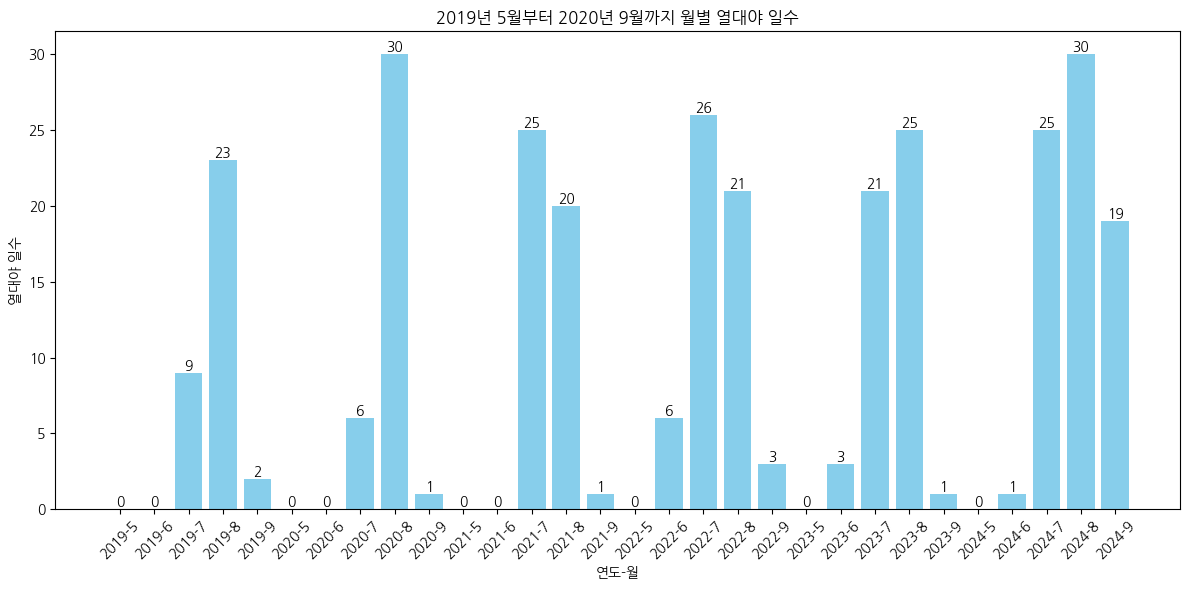

In [ ]:
import matplotlib.pyplot as plt

# '일시' 열에서 연도와 월을 추출하여 새로운 열 생성
df_jeju_final['연도'] = pd.to_datetime(df_jeju_final['일시']).dt.year
df_jeju_final['월'] = pd.to_datetime(df_jeju_final['일시']).dt.month

# 월별 열대야 일수를 집계하여 데이터프레임 생성
df_tropical_nights = df_jeju_final.groupby(['연도', '월'])['열대야'].sum().reset_index()
df_tropical_nights.columns = ['연도', '월', '열대야 일수']

# 막대그래프 생성
plt.figure(figsize=(12, 6))
bars = plt.bar(df_tropical_nights['연도'].astype(str) + '-' + df_tropical_nights['월'].astype(str),
               df_tropical_nights['열대야 일수'], color='skyblue')
plt.title('2019년 5월부터 2020년 9월까지 월별 열대야 일수')
plt.xlabel('연도-월')
plt.ylabel('열대야 일수')

# 각 막대 위에 숫자 표시
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',
             ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


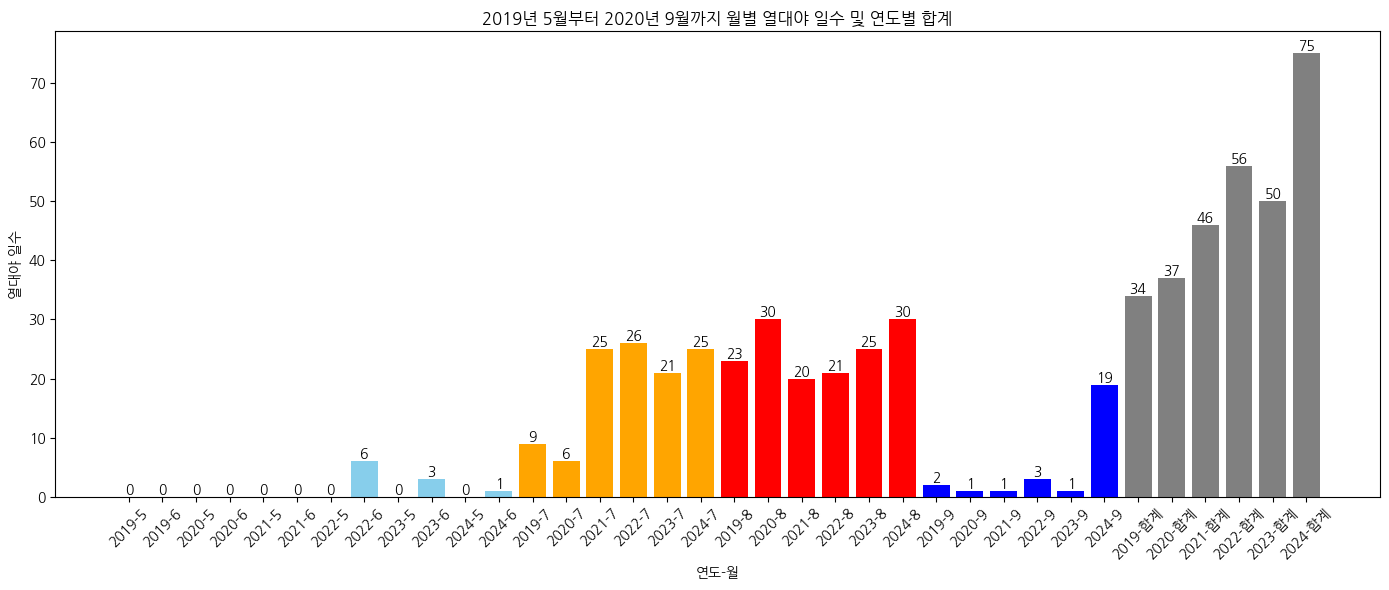

In [ ]:
# Remove any previous total rows and recalculate with specified format for clarity
# Extract necessary data for the graph
df_jeju_final['연도'] = pd.to_datetime(df_jeju_final['일시']).dt.year
df_jeju_final['월'] = pd.to_datetime(df_jeju_final['일시']).dt.month

# Compute monthly and yearly tropical nights count
df_tropical_nights = df_jeju_final.groupby(['연도', '월'])['열대야'].sum().reset_index()
yearly_totals = df_tropical_nights.groupby('연도')['열대야'].sum().reset_index()
yearly_totals['월'] = '합계'

# Merge the monthly and yearly data, sorting by the year and custom order
df_combined = pd.concat([df_tropical_nights, yearly_totals], ignore_index=True)
df_combined = df_combined.sort_values(by=['연도', '월'], key=lambda x: x.map({7: 1, 8: 2, 9: 3, '합계': 4}).fillna(0)).reset_index(drop=True)

# Custom color for months and yearly totals
colors = []
for _, row in df_combined.iterrows():
    if row['월'] == 7:
        colors.append('orange')
    elif row['월'] == 8:
        colors.append('red')
    elif row['월'] == 9:
        colors.append('blue')
    elif row['월'] == '합계':
        colors.append('gray')
    else:
        colors.append('skyblue')

# Prepare x labels as "연도-월" format
df_combined['x_labels'] = df_combined['연도'].astype(str) + '-' + df_combined['월'].astype(str)

# Plotting
plt.figure(figsize=(14, 6))
bars = plt.bar(df_combined['x_labels'], df_combined['열대야'], color=colors)
plt.title('2019년 5월부터 2020년 9월까지 월별 열대야 일수 및 연도별 합계')
plt.xlabel('연도-월')
plt.ylabel('열대야 일수')

# Add data labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',
             ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


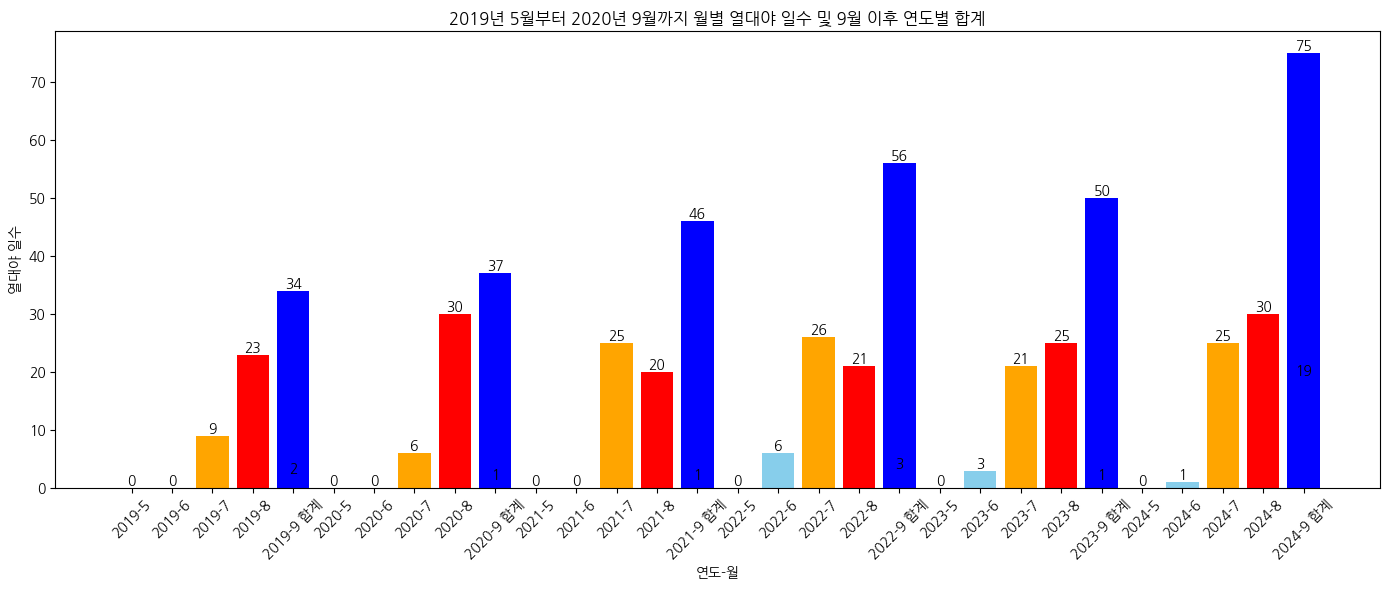

In [ ]:
# Recalculate monthly tropical nights count and yearly totals
df_tropical_nights = df_jeju_final.groupby(['연도', '월'])['열대야'].sum().reset_index()
yearly_totals = df_tropical_nights.groupby('연도')['열대야'].sum().reset_index()
yearly_totals['월'] = 9  # Align yearly total after September

# Merge the monthly data with yearly totals (displayed after September)
df_combined = pd.concat([df_tropical_nights, yearly_totals], ignore_index=True)
df_combined = df_combined.sort_values(by=['연도', '월']).reset_index(drop=True)

# Custom color for months and yearly totals
colors = ['orange' if row['월'] == 7 else 'red' if row['월'] == 8 else 'blue' if row['월'] == 9 else 'gray' if row['월'] == 9 and row['연도'] in yearly_totals['연도'].values else 'skyblue' for _, row in df_combined.iterrows()]

# x_labels formatting for display
df_combined['x_labels'] = df_combined.apply(lambda x: f"{int(x['연도'])}-9 합계" if x['연도'] in yearly_totals['연도'].values and x['월'] == 9 else f"{int(x['연도'])}-{int(x['월'])}", axis=1)

# Plotting
plt.figure(figsize=(14, 6))
bars = plt.bar(df_combined['x_labels'], df_combined['열대야'], color=colors)
plt.title('2019년 5월부터 2020년 9월까지 월별 열대야 일수 및 9월 이후 연도별 합계')
plt.xlabel('연도-월')
plt.ylabel('열대야 일수')

# Add data labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


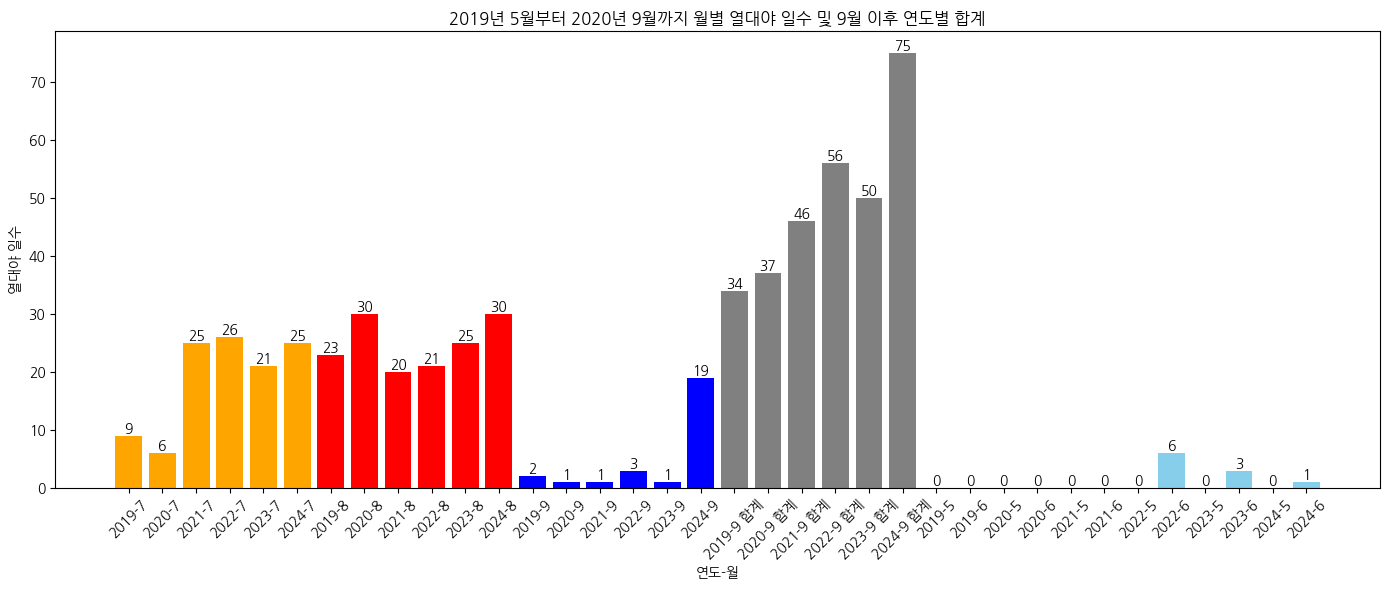

In [ ]:
# Calculate monthly tropical nights count and yearly totals
df_tropical_nights = df_jeju_final.groupby(['연도', '월'])['열대야'].sum().reset_index()
yearly_totals = df_tropical_nights.groupby('연도')['열대야'].sum().reset_index()
yearly_totals['월'] = '합계'  # Mark yearly total with '합계'

# Merge the monthly data with yearly totals, ensuring 9월 data remains before 합계
df_combined = pd.concat([df_tropical_nights, yearly_totals], ignore_index=True)
df_combined['월'] = df_combined['월'].apply(lambda x: int(x) if x != '합계' else x)  # Keep 9 as int and 합계 as str
df_combined = df_combined.sort_values(by=['연도', '월'], key=lambda x: x.map({7: 1, 8: 2, 9: 3, '합계': 4})).reset_index(drop=True)

# Custom color for months and yearly totals
colors = ['orange' if row['월'] == 7 else 'red' if row['월'] == 8 else 'blue' if row['월'] == 9 else 'gray' if row['월'] == '합계' else 'skyblue' for _, row in df_combined.iterrows()]

# Prepare x labels as "연도-월" format
df_combined['x_labels'] = df_combined.apply(lambda x: f"{int(x['연도'])}-9 합계" if x['월'] == '합계' else f"{int(x['연도'])}-{int(x['월'])}", axis=1)

# Plotting
plt.figure(figsize=(14, 6))
bars = plt.bar(df_combined['x_labels'], df_combined['열대야'], color=colors)
plt.title('2019년 5월부터 2020년 9월까지 월별 열대야 일수 및 9월 이후 연도별 합계')
plt.xlabel('연도-월')
plt.ylabel('열대야 일수')

# Add data labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
